In [94]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [95]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'model_input_table'
]

In [96]:
catalog.load("model_input_table")

[10/23/25 03:02:18] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=997747;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=74813;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Name  Age  Nationality  Overall  Potential  \
0      Bruno Fernandes   26     Portugal       88         89   
1          L. Goretzka   26      Germany       87         88   
2            L. Suárez   34      Uruguay       88         88   
3             M. Acuña   29    Argentina       84         84   
4           J. Kimmich   26      Germany       89         90   
...                ...  ...          ...      ...        ...   
50521       V. Storsve   17       Norway       50         72   
50522        B. Sinzig   19  Switzerland       50         60   
50523    18 N. Krucker   18  Switzerland       50         61   
50524    18 A. Viscovo   18        Italy       51         70   
50525       H. Sveijer   17       Sweden       48         63   

                     Club  Special Preferred Foot  International Reputation  \
0       Manchester United     2341          Right                       3.0   
1       FC Bayern München     2314          Right                       4.0   
2      Atlético de Madrid     2307          Right                       5.0   
3              Sevilla FC     2292           Left                       2.0   
4       FC Bayern München     2283          Right                       4.0   
...                   ...      ...            ...                       ...   
50521       Lillestrøm SK      773          Right                       1.0   
50522     Neuchâtel Xamax      764          Right                       1.0   
50523       FC St. Gallen      757          Right                       1.0   
50524             Crotone      755          Right                       1.0   
50525           IK Sirius      740          Right                       1.0   

       Weak Foot  ...  Overall_Class Joined_Year Joined_Month Joined_Day  \
0            3.0  ...           Alto           0            0          0   
1            4.0  ...           Alto           0            0          0   
2            4.0  ...           Alto           0            0          0   
3            3.0  ...          Medio           0            0          0   
4            4.0  ...           Alto           0            0          0   
...          ...  ...            ...         ...          ...        ...   
50521        2.0  ...           Bajo           0            0          0   
50522        2.0  ...           Bajo           0            0          0   
50523        3.0  ...           Bajo           0            0          0   
50524        2.0  ...           Bajo           0            0          0   
50525        2.0  ...           Bajo           0            0          0   

       Height_cm  Weight_kg    Value_num  Wage_num  Release Clause_num  Year  
0            179  69.000000  107500000.0  250000.0         206900000.0  2022  
1            189  82.000000   93000000.0  140000.0         160400000.0  2022  
2            182  83.000000   44500000.0  135000.0          91200000.0  2022  
3            172  69.000000   37000000.0   45000.0          77700000.0  2022  
4            177  75.000000  108000000.0  160000.0         186300000.0  2022  
...          ...        ...          ...       ...                 ...   ...  
50521        185  64.863656      50000.0    5000.0            113000.0  2020  
50522        190  81.192968      35000.0    5000.0             58000.0  2020  
50523        183  79.832192      35000.0    1000.0             66000.0  2020  
50524        190  78.925008      60000.0    5000.0            146000.0  2020  
50525        185  76.203456      50000.0    5000.0             94000.0  2020  

[50526 rows x 65 columns]

In [97]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=470012;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=687579;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [9]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt

# -- Importaciónes de scikit learn --

from sklearn.preprocessing import MinMaxScaler  # podemos normalizar los datos, para que la escala de los datos sean entre 0 y 1. Ideal para los features.
from sklearn.preprocessing import LabelEncoder

# -- Procesado y modelado --
from sklearn.linear_model import LinearRegression # Regresion lineal simple y para Regresion lineal multiple
from sklearn.model_selection import train_test_split

# -- Metricas --
# Las metricas nos permite evaluar la calidad, precision, del modelo.
# Estas metricas son utilizadas solo para los modelos de regresión. Para los mdodelo de clasificación son diferentes.

#Preguntas del proceso: ¿Que significa estas metrica?

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

#- Métricas del Modelo de Regresión 
#- Mean Squared Error (MSE)
#- Mean Absolute Error (MAE)
#- Root Mean Squared Error (RMSE)
#- R2 Score: 0.8556033776780865

# -- GridSearchCV -- 

# La funcion o el proposito del GrindSeearch es encontrar de forma automatica, los mejores PARAMETROS para el modelo
# Al finalizaar el Grid, te entrega las metricas mejores metricas del modelo encontrado
# para utilizar el GridSearchCV debes configurar los parametros basicos, puedes agregar mas parametros, agregar y modificar valores segun corresponda
# en simple resumen, su funcion es hacer todo el proceso del modelado y tratar de dar el mejor resultado encontrado.

#Siempre investiga para obtener el mejor resultado, ejemplo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn.model_selection import GridSearchCV

# -- CrossValidation -- para modelos de clasificacion o de regresion?


## **Modelo de Regresion Multiple**

![Image](https://fhernanb.github.io/libro_regresion/Regresion_con_R_files/figure-html/3d_refrescos_01-1.png)


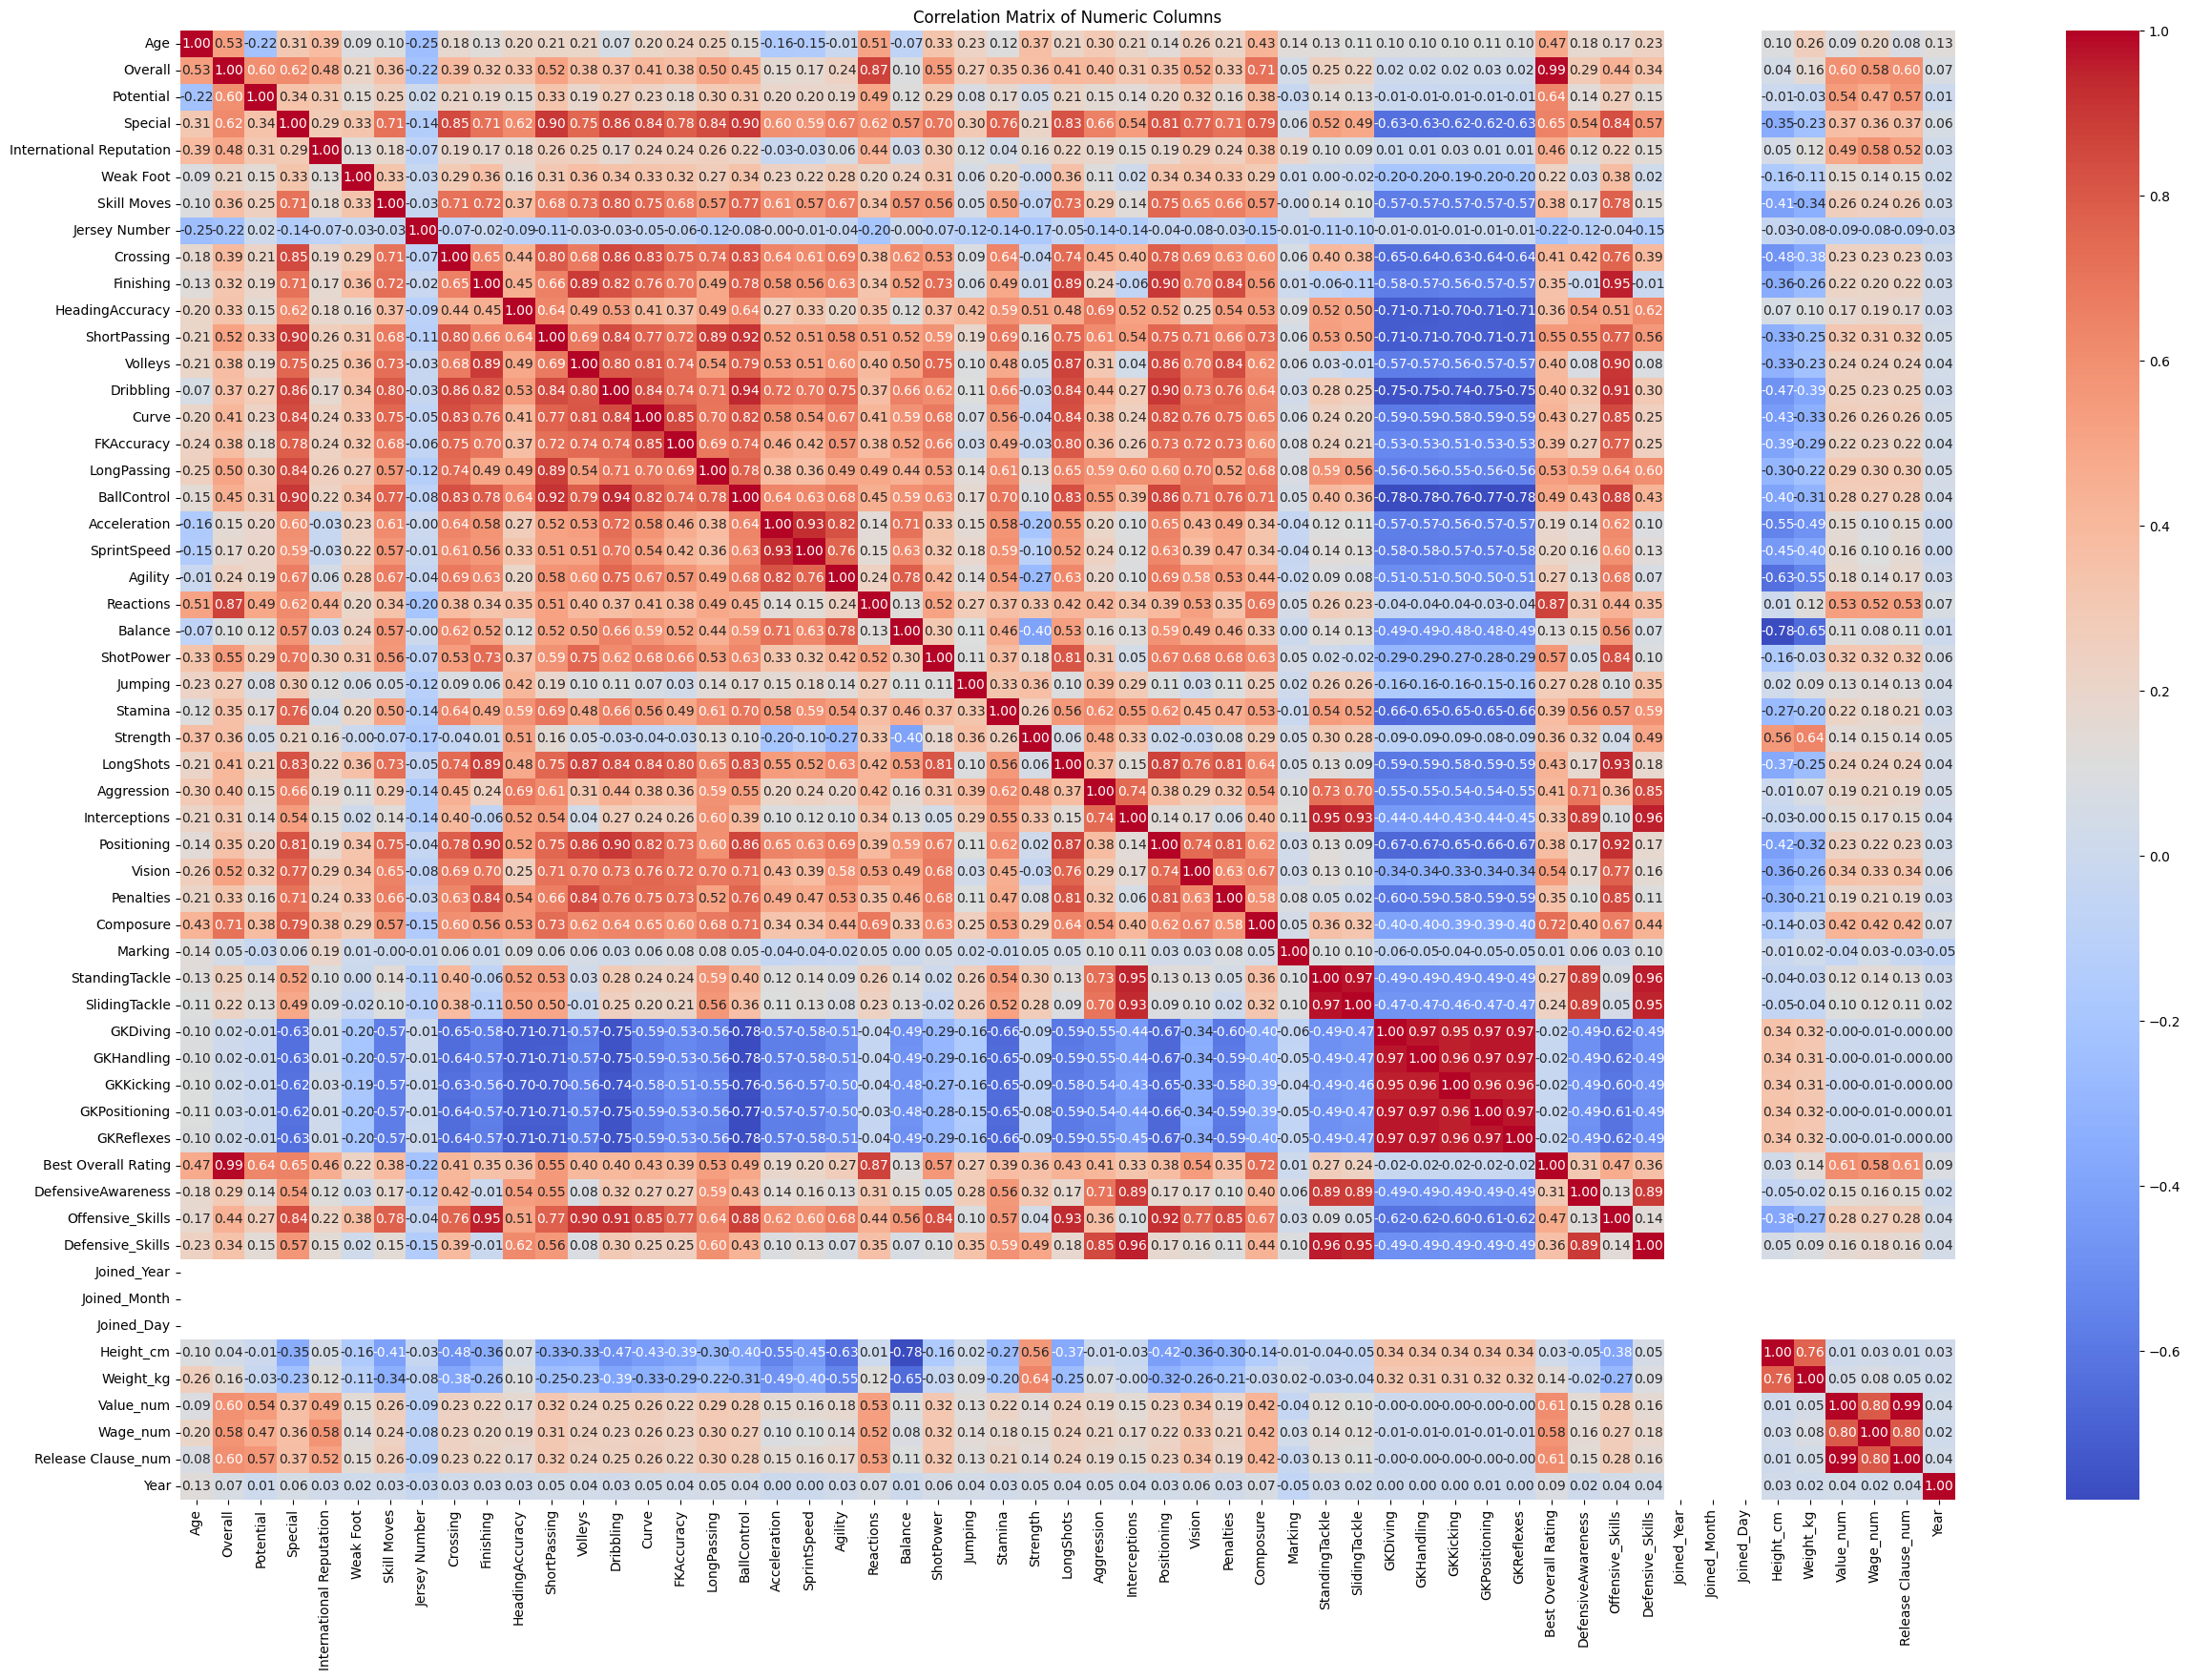

In [99]:
numeric_df = df_FIFA.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### **Gráficos**

- Puedes generar gráficos de dispersión entre la variable objetivo (Y) y las variables predictoras (X) para analizar el comportamiento y la distribución de los datos.
  
- En un modelo de regresión lineal múltiple, una relación lineal fuerte (positiva o negativa) entre las variables puede mejorar el desempeño del modelo.
  
- Ten en cuenta que esto no aplica a todos los modelos, ya que cada uno maneja las relaciones entre variables de forma distinta. Por ejemplo, modelos no lineales (como árboles de decisión o redes neuronales) no dependen de la correlación de Pearson.


#### **Selección de caracteristicas**

In [101]:
# en X sera la cantidad de caracteristicas (columnas) que le asignaremos para predecir la variable Y 
# En el modelo de regresion lineal multiple, se utiliza mas de una caracteristica o dimension
# No olvidar que para la agregación de caracteristicas debes tener un criterio logico, es decir, que almenos tenga un centido entre
# la la variable X y la Y.

x = df_FIFA[["Overall"]] # Todos los modelo deben tener la misma combinación de las caracteristicas, 
                         # en caso de que esa combinacion no de resultados
                         # Realiza otra combinacion, no utilizar diferentes combinaciones en los modelos de regresion 
                         # (El profe lo tomara como malo)

y = df_FIFA['Value_num']

#### **División de los datos en entrenamiento y prueba**

In [102]:
# Dependiendo de tu dataset, lo ideal es dividir los datos en 80% 20% o 70% 30% 
# 80% datos de entrenamiento 
# 20% datos de test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, # para entrenamiento usaremos el 20% de los datos
    random_state=42, # Semilla random que definimos
    shuffle = True #si no lo definido, dara el 80% de otra manera, aleatorioa
)

#### **Creación del modelo y ajuste (fit)**

Creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas Y.

In [103]:
#model = LinearRegression()
#model.fit(X_train, y_test)
#Y_hat = model.predict(X_test)

model = LinearRegression()    #Creacion del modelo (puedes agregar parametros aqui manualmente)
model.fit(X_train, y_train)   # Entrena con los datos de entrenamiento
Y_hat = model.predict(X_test) # Predice con los datos de prueba


### **Métricas de evaluación**

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Y_hat)
r2 = r2_score(y_test, Y_hat)

# Métricas de evaluación
mse = mean_squared_error(y_test, Y_hat)
mae = mean_absolute_error(y_test, Y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_hat)

# Mostrar resultados
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R² (Variance score): {r2:.2f}")

Mean Squared Error (MSE): 23346708571345.145
Mean Absolute Error (MAE): 2578965.441297669
Root Mean Squared Error (RMSE): 4831843.185715483
R² (Variance score): 0.37


### **GridsearchCV**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

### **CrossValidation**